# 6 Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html


In [2]:
path = 'C:/Users/Juliana/Documents/DATA ANALYTICS COURSE/IMMERSION/6'

In [3]:
# Import data
data = pd.read_csv(os.path.join(path,'02 Data','Cleaned Data','Merged Data Comp','merged_data_complete.csv'))

In [4]:
# Import temperature data
temp_data = pd.read_csv(os.path.join(path,'02 Data','Cleaned Data','temp_changes_clean.csv'))

In [5]:
temp_data.head()

,Unnamed: 0,Country,Months,Year,Temperature_Change,Country_Code,Month
0,4,Afghanistan,January,1965,1.834,AFG,1.0
1,5,Afghanistan,January,1966,3.780,AFG,1.0
2,6,Afghanistan,January,1967,-1.398,AFG,1.0
3,7,Afghanistan,January,1968,0.349,AFG,1.0
4,8,Afghanistan,January,1969,-2.325,AFG,1.0


In [6]:
temp_data.columns

Index(['Unnamed: 0', 'Country', 'Months', 'Year', 'Temperature_Change',
       'Country_Code', 'Month'],
      dtype='object')

In [7]:
# Combine 'year' and 'month' columns into a new column 'datetime'
temp_data['datetime'] = pd.to_datetime(temp_data[['Year', 'Month']].assign(day=1))

In [8]:
temp_data.head()

,Unnamed: 0,Country,Months,Year,Temperature_Change,Country_Code,Month,datetime
0,4,Afghanistan,January,1965,1.834,AFG,1.0,1965-01-01
1,5,Afghanistan,January,1966,3.780,AFG,1.0,1966-01-01
2,6,Afghanistan,January,1967,-1.398,AFG,1.0,1967-01-01
3,7,Afghanistan,January,1968,0.349,AFG,1.0,1968-01-01
4,8,Afghanistan,January,1969,-2.325,AFG,1.0,1969-01-01


In [9]:
# Aggregate the temperature by average monthly temperature change worldwide
temp_data_global= temp_data.groupby(['datetime']).agg({'Temperature_Change': 'mean'}).reset_index()

In [10]:
temp_data_global.head()

,datetime,Temperature_Change
0,1965-01-01,-0.159840
1,1965-02-01,-0.446875
2,1965-03-01,-0.223568
3,1965-04-01,-0.513613
4,1965-05-01,-0.249894


In [11]:
# Set the 'datetime' column as the index of the dataframe
temp_data_global = temp_data_global.set_index('datetime')

# Display the updated DataFrame
temp_data_global.head()

,Temperature_Change
datetime,
1965-01-01,-0.159840
1965-02-01,-0.446875
1965-03-01,-0.223568
1965-04-01,-0.513613
1965-05-01,-0.249894


In [12]:
type(temp_data)

pandas.core.frame.DataFrame

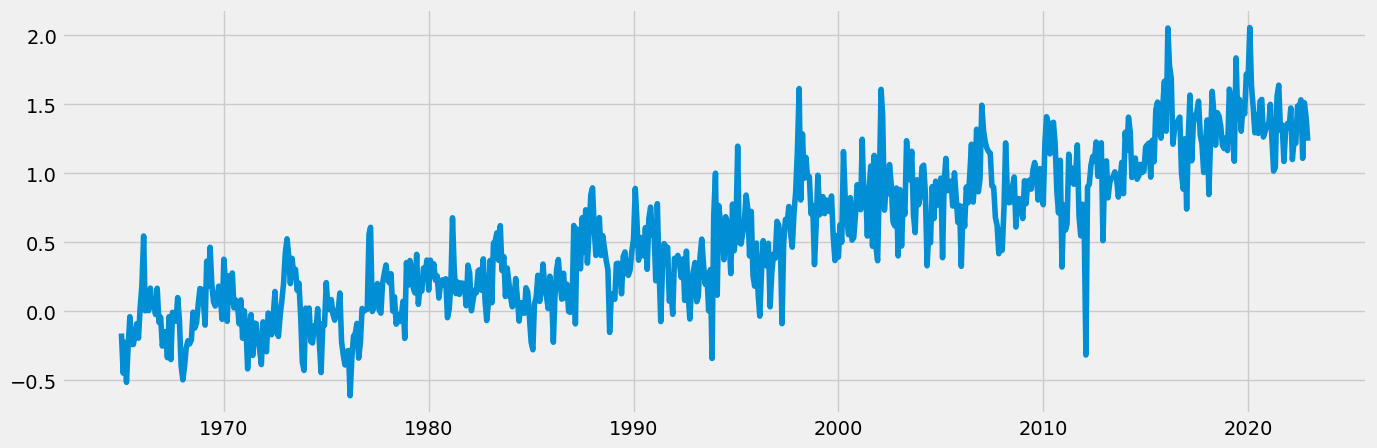

In [13]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(temp_data_global)

In [14]:
# Check for missing values (you shouldn't have any)

temp_data_global.isnull().sum() 

Temperature_Change    0
dtype: int64

In [15]:
# Check for duplicates

dups = temp_data_global.duplicated()
dups.sum()

1

In [16]:
#Deleting duplicates
temp_data_global=temp_data_global.drop_duplicates()

In [17]:
# Check for duplicates

dups = temp_data_global.duplicated()
dups.sum()

0

In [18]:
temp_data_global.head()

,Temperature_Change
datetime,
1965-01-01,-0.159840
1965-02-01,-0.446875
1965-03-01,-0.223568
1965-04-01,-0.513613
1965-05-01,-0.249894


### 3. Time-series analysis: decomposition

In [20]:
# Set the frequency of the datetime index to monthly
temp_data_global.index = pd.to_datetime(temp_data_global.index) + pd.DateOffset(months=1)

In [21]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(temp_data_global, model='additative', period=12) 

In [22]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

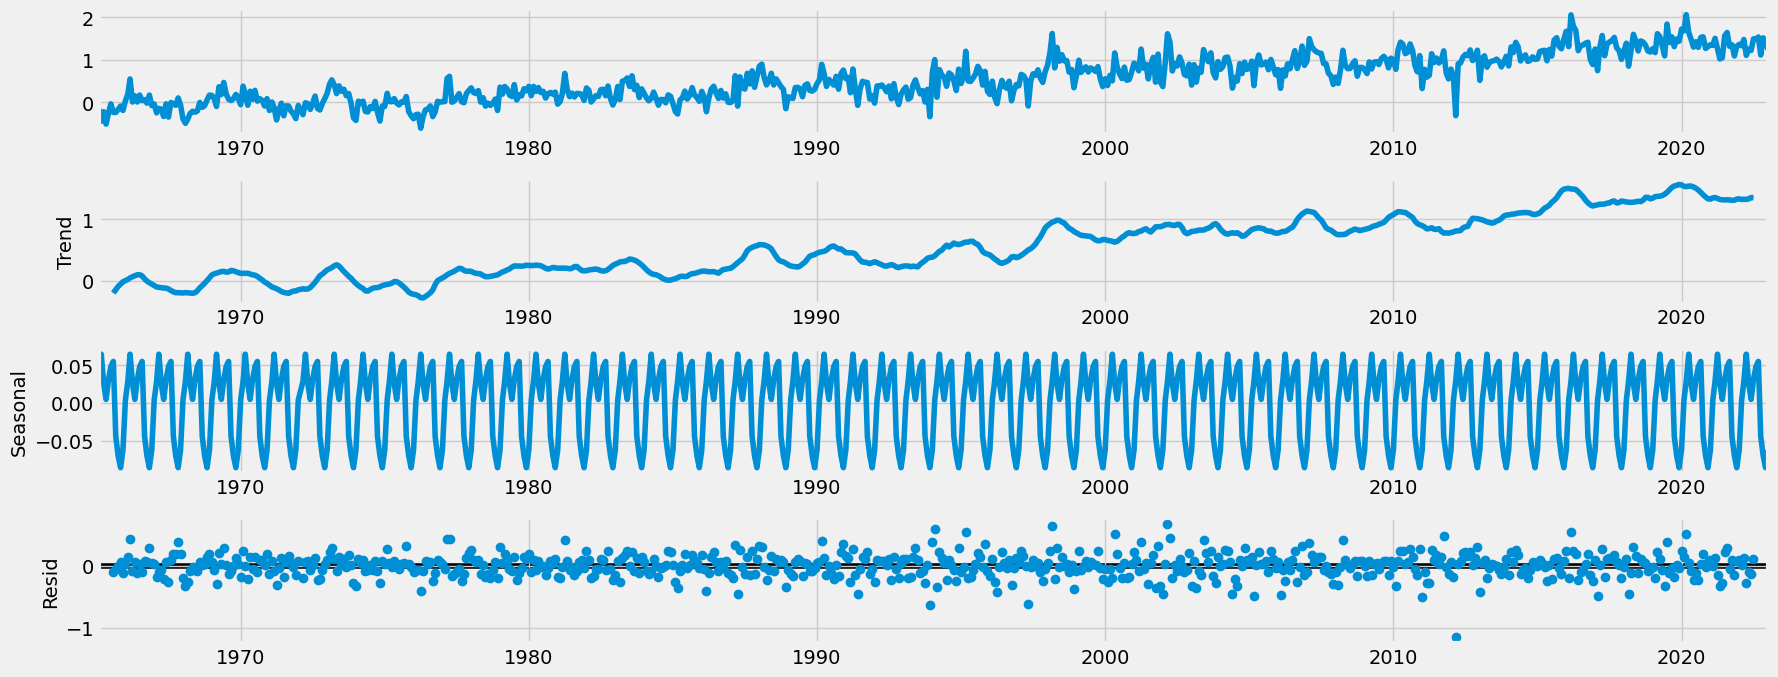

In [23]:
# Plot the separate components

decomposition.plot()
plt.show()

Comment:

- Despite the fluctuations in temperature throughout the years, the trend line clearly indicates a historical increase in global temperature changes.
- The data exhibits a distinct seasonality, which is expected given its representation of temperature by month, showcasing the annual temperature variations.
- The decomposition plots reveal that the data is non-stationary due to the presence of both a trend and seasonality.

### 4. Testing for stationarity

In [24]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(temp_data_global['Temperature_Change'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.425395
p-value                          0.570043
Number of Lags Used             12.000000
Number of Observations Used    682.000000
Critical Value (1%)             -3.439975
Critical Value (5%)             -2.865787
Critical Value (10%)            -2.569032
dtype: float64


The test statistic value is not smaller than the critical value. Therefore, we confirm that the data is non-stationary.

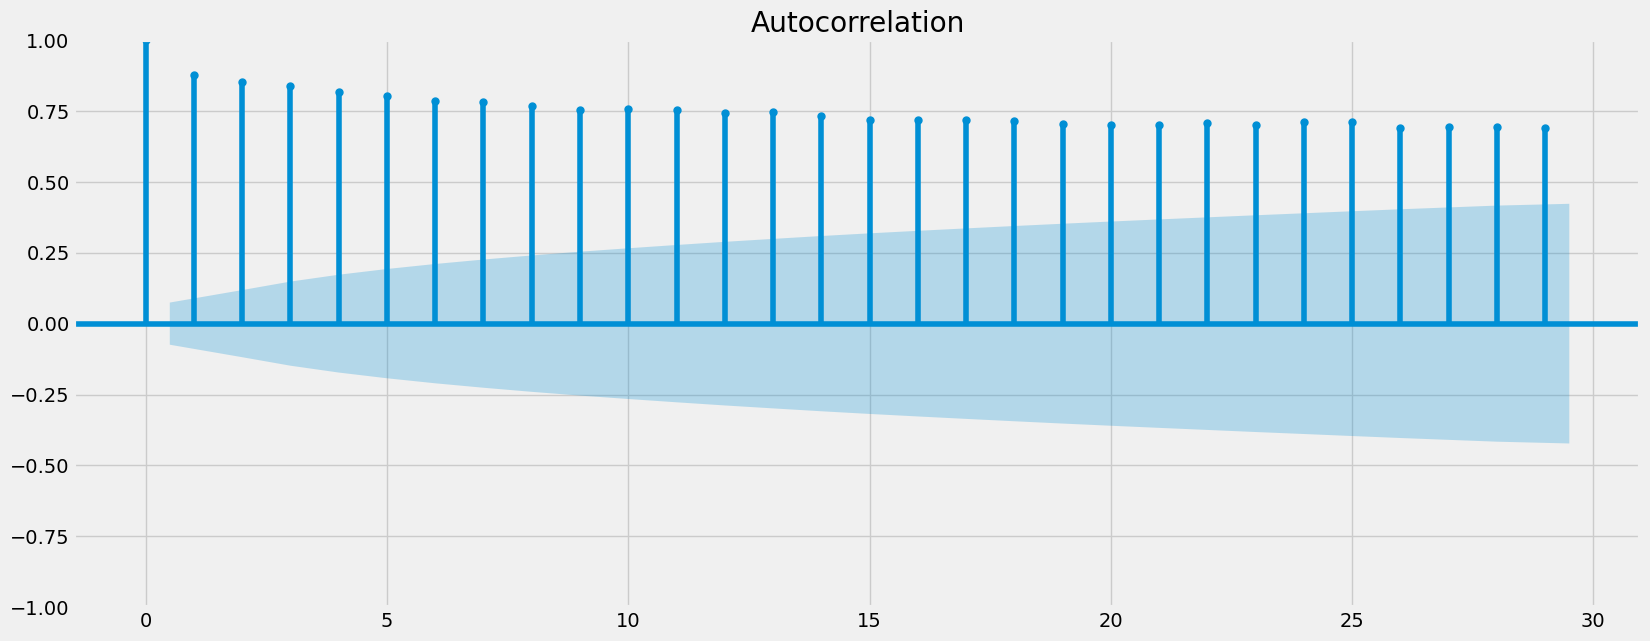

In [25]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(temp_data_global)
plt.show()

The plot shoes that all lags extend beyond the edge of the confidence interval, indicating significant correlation between them. This further confirms the non-stationary nature of the data, aligning with the findings of the Dickey-Fuller test.

### 5. Stationarizing the Temperature Data

In [26]:
data_diff = temp_data_global - temp_data_global.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [27]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [28]:
data_diff.head()

,Temperature_Change
datetime,
1965-03-01,-0.287035
1965-04-01,0.223307
1965-05-01,-0.290045
1965-06-01,0.263719
1965-07-01,0.212010


In [29]:
data_diff.columns

Index(['Temperature_Change'], dtype='object')

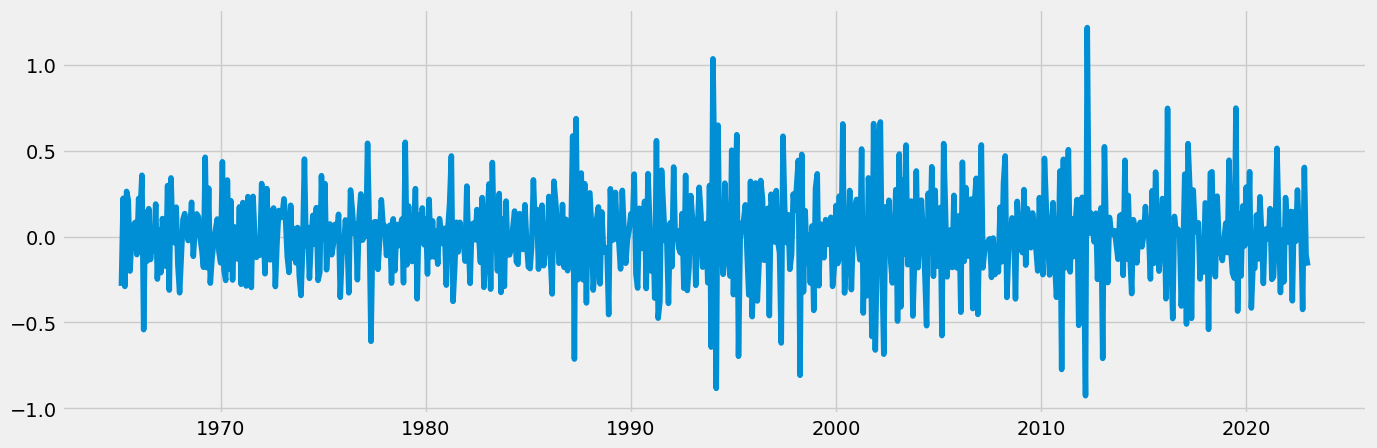

In [30]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [31]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.143004e+01
p-value                        6.550697e-21
Number of Lags Used            1.100000e+01
Number of Observations Used    6.820000e+02
Critical Value (1%)           -3.439975e+00
Critical Value (5%)           -2.865787e+00
Critical Value (10%)          -2.569032e+00
dtype: float64


The test statistic (-11.43) being less than the critical values at the 1%, 5%, and 10% significance levels, along with a p-value < 0.05, indicates that the data is stationary.

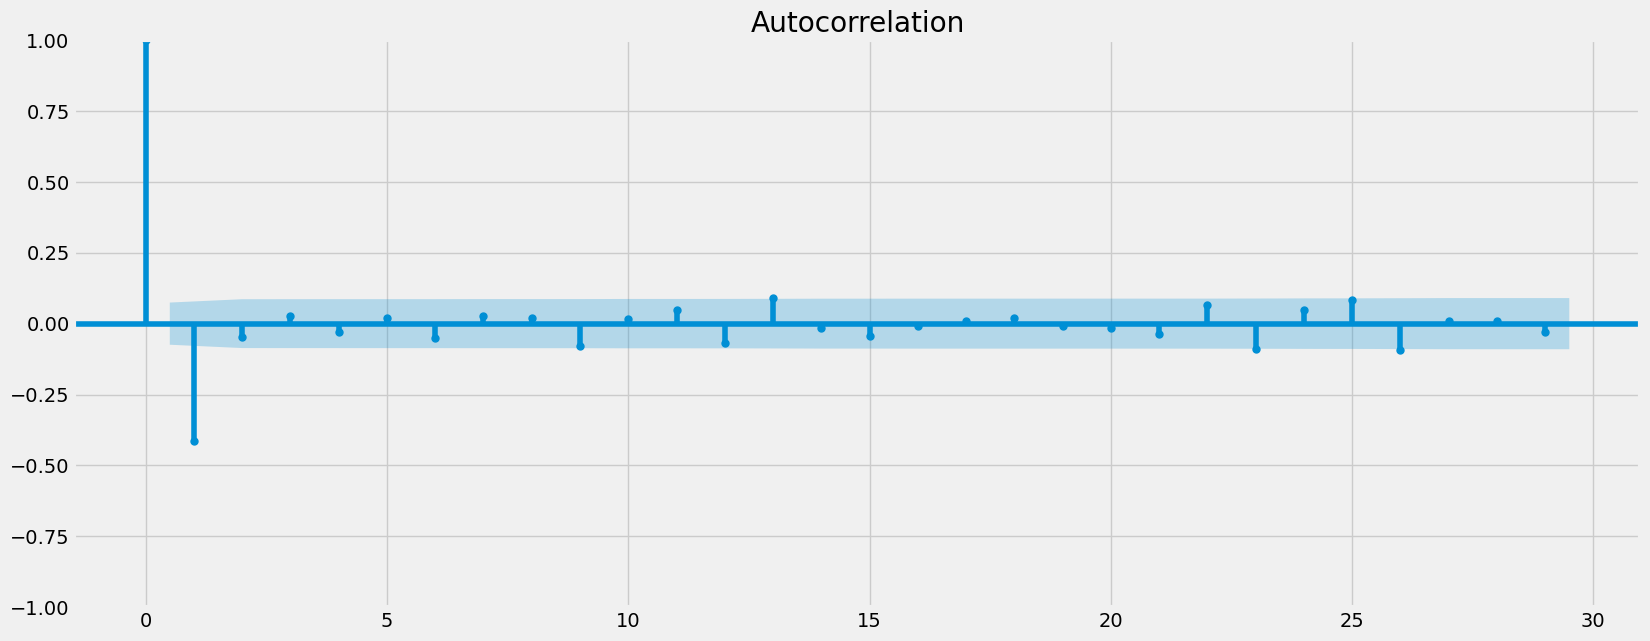

In [32]:
plot_acf(data_diff)
plt.show()

While the autocorrelation plot has improved it is not perfect. However, given that the number is below 10, a second round of differencing is not necessary.